# Multiband Unsupervised Satellite Image Classification

### Description:
Multiband Satellite images are classified into multiple land areas by using clustering.

### Data
The data is available in the public domain and is from Digital Globe. The raw images have 4 bands: Red, Green, Blue and Near-infrared (NIR). 

Data Source: Will be updated

### Author:
Praveen Pankajakshan

### Author Email address:
praveen.pankajakshan@corteva.com

### Dated:
December 22, 2019

### Last Modified: 
December 22, 2019

Install the libraries

In [3]:
!pip install libtiff

In [0]:
import numpy as np
from sklearn import cluster
from libtiff import TIFF
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Read the Digital Globe Satellite Image

In [0]:
tif = TIFF.open('Raw Image_1.tif')
X = tif.read_image()

In [6]:
print('Input image size:', np.shape(X))

('Input image size:', (1295, 1364, 4))


Input image is of shape 1295x1364 with 4 bands: R, G, B and NIR

Read Ground Truth data to compare visually the clustering

In [0]:
tif = TIFF.open('gt_1.tif')
Y = tif.read_image()

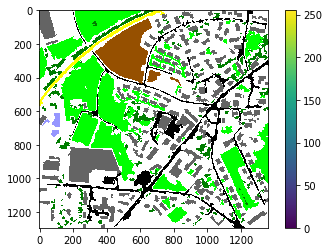

In [8]:
plt.imshow(Y)
plt.colorbar()

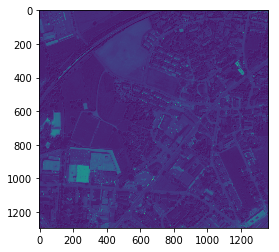

In [9]:
plt.imshow(X[:, :, 0])

Unsupervised Learning: kMeans Clustering
Using only R channel

In [0]:
I = X[:, :, 0].reshape((-1, 1))


In [11]:
print(np.shape(I), 1295*1364)

((1766380, 1), 1766380)


In [0]:
# Choosing 8 clusters
k_means = cluster.KMeans(n_clusters=6)
# Clustering with Number of samples (pixels) x Number of features (Bands)
k_means.fit(I)
I_cluster = k_means.labels_
I_cluster = I_cluster.reshape(X[:, :, 0].shape)

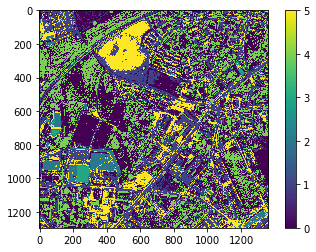

In [13]:
#plt.figure(figsize=(20,20))
plt.imshow(I_cluster)
plt.colorbar()
#plt.show()

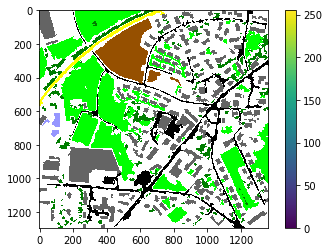

In [15]:
#plt.figure(figsize=(20,20))
plt.imshow(Y)
plt.colorbar()
#plt.show()

In [0]:
class_list = np.unique(Y)
nclass = class_list.size

In [0]:
nclass

6

Unsupervised Learning using all the Channels

In [0]:
I = X.reshape((-1, 4))

In [23]:
k_means = cluster.KMeans(n_clusters=6)
# Clustering with Number of samples (pixels) x Number of features (Bands)
k_means.fit(I)
I_cluster = k_means.labels_
I_cluster = I_cluster.reshape(X[:, :, 0].shape)

ValueError: ignored

In [0]:
y_kmeans = k_means.predict(I)

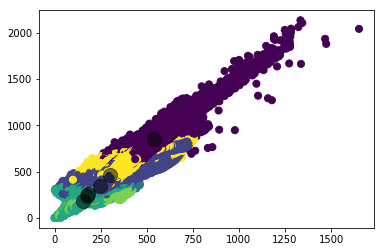

In [27]:
plt.scatter(I[:, 0], I[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = k_means.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

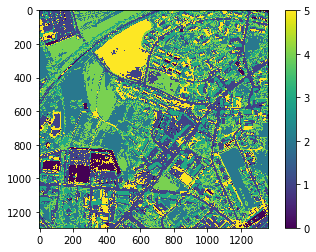

In [25]:
plt.imshow(I_cluster)
plt.colorbar()